## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

number of rows in original table 72390
number of rows in original table 4693
count    4693.000000
mean       22.627957
std         4.714944
min        13.000000
25%        19.000000
50%        22.000000
75%        25.000000
max        60.000000
Name: agewed, dtype: float64
Pisces 0.09
Cancer 0.09
Gemini 0.09
Leo 0.09
Libra 0.09
Virgo 0.08
Aquarius 0.08
Taurus 0.08
Scorpio 0.08
Capricorn 0.08
Aries 0.08
Sagittarius 0.08

 Married      4692
Separated       1
Name: marital, dtype: int64

 NO     3738
YES     955
Name: divorce, dtype: int64

Proportion of people who got married then divorced:  0.2

 hapmar       NOT TOO HAPPY  PRETTY HAPPY  VERY HAPPY
zodiac                                              
Aquarius                12           121         253
Aries                   11           144         215
Cancer                  15           139         260
Capricorn                3           131         239
Gemini                  13           143         254
Leo                     12

<Axes: xlabel='zodiac', ylabel='count'>

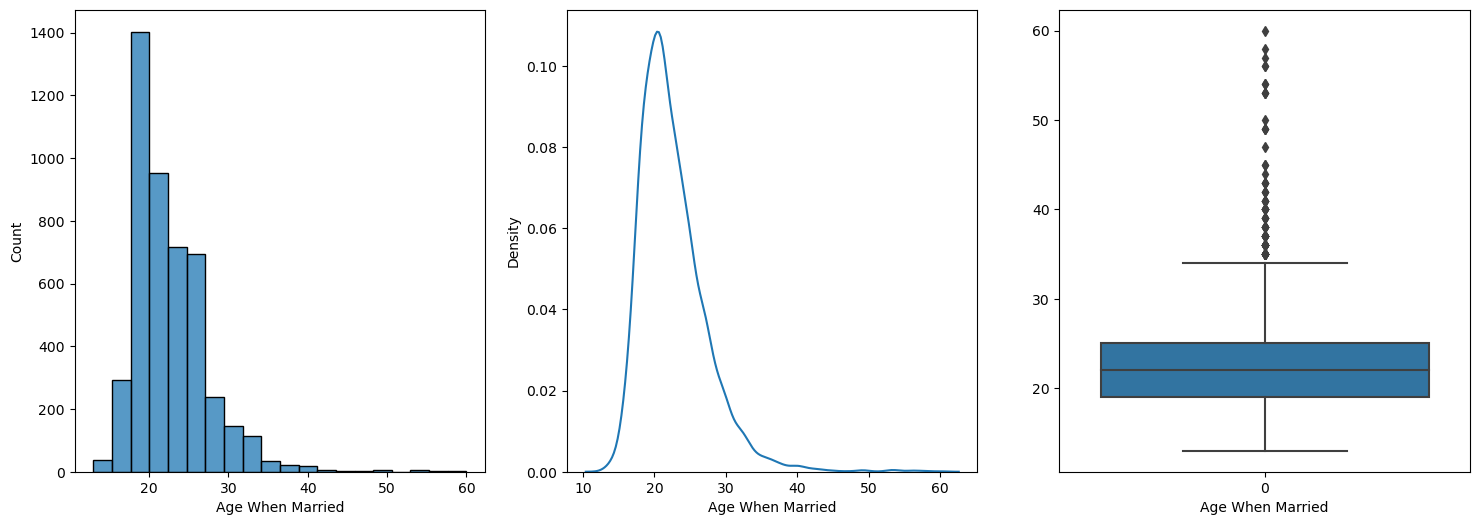

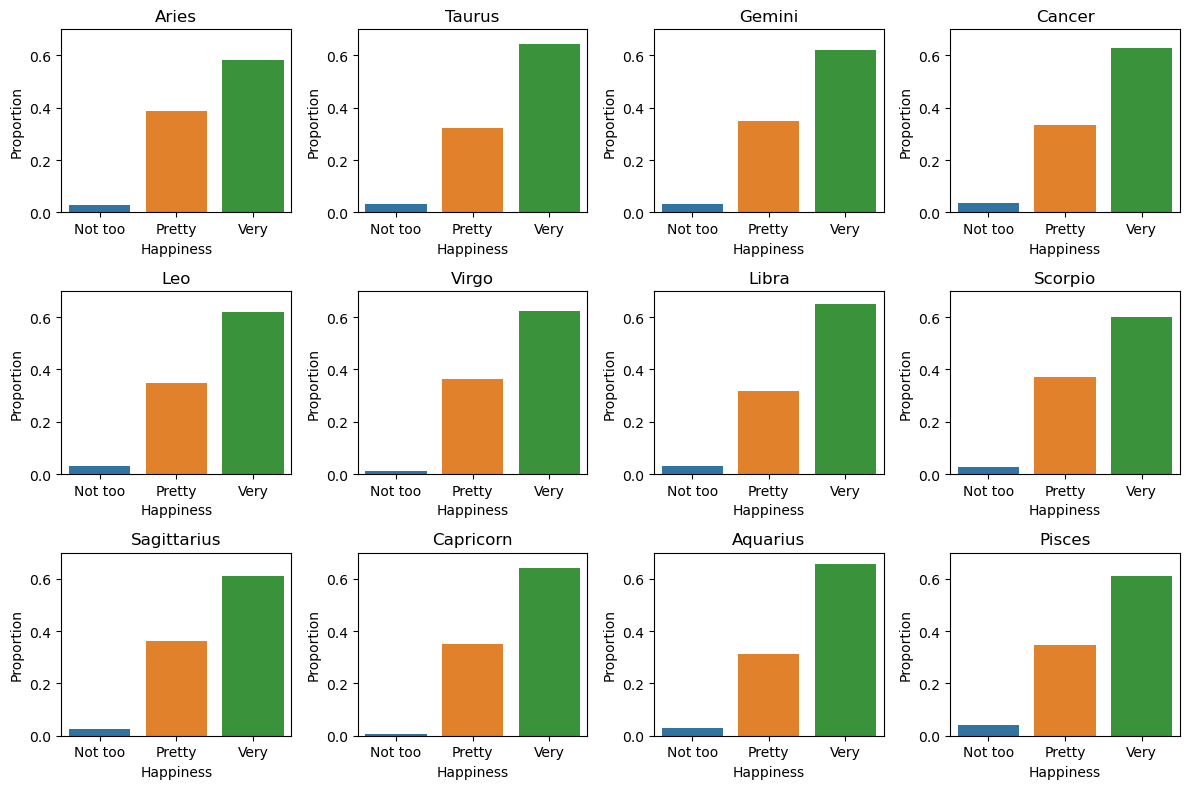

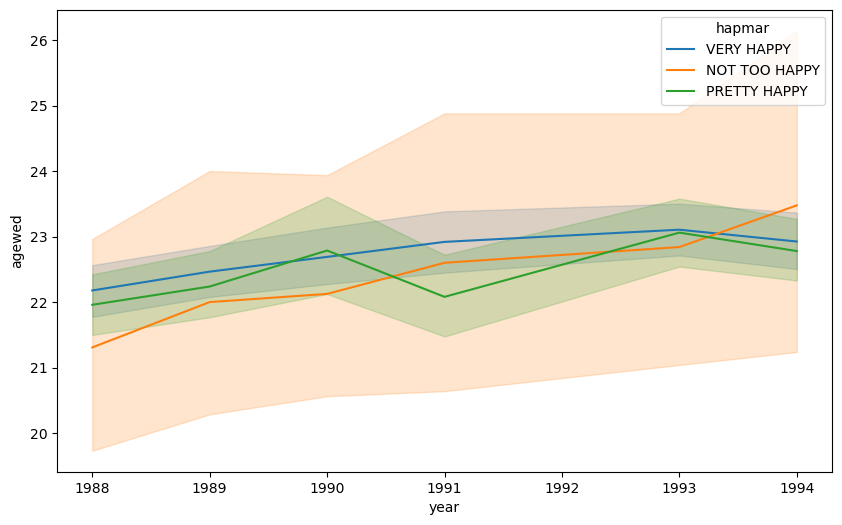

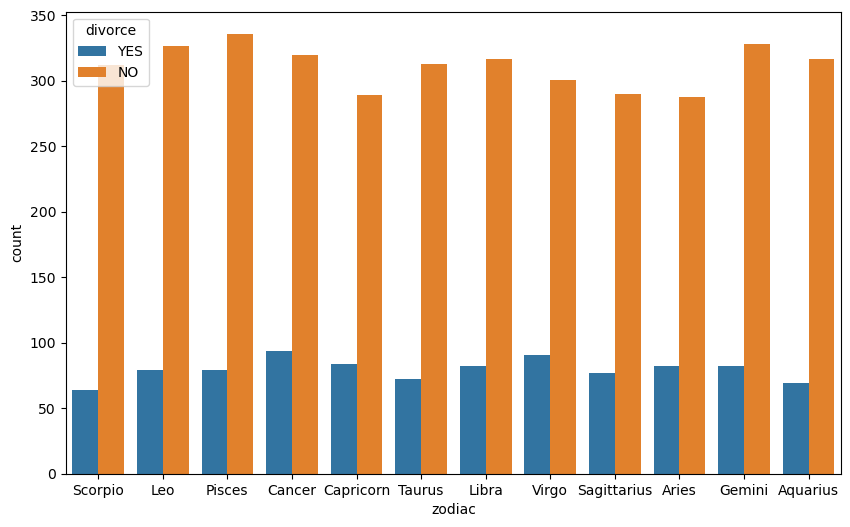

In [ ]:
#2.
# print('The variables I chose to look at from GSS were year, id, ballot, marital, agewed, divorce, hapmar, and zodiac. '+
#       '\nYear refers to the GSS year for the respondant, id is the respondent id number, marital is the marital status'+
#       '\nof the respondent, agewed is the age when first married, divorce is if the respondent has ever been divorced or'+
#       '\nseperated, hapmar is the happiness of their marriage, zodiac is the respondents astrological sign, and ballot' +
#       '\nis the ballot used for interview. I chose these variables because I thought it would be interesting to see if'+ 
#       '\nthere was any correlation between zodiac sign and marriage/marital happiness. ')
#3. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_excel('./GSS.xlsx')

print('number of rows in original table', df.shape[0]) #get shape of original table
df_filtered = df[~df.isin(['.i:  Inapplicable']).any(axis=1)]  #take out any inapplicable 
df_filtered = df_filtered[~df_filtered.isin(['.n:  No answer']).any(axis=1)]    #take out any no answer
df_filtered = df_filtered[~df_filtered.isin(['.y:  Not available in this year']).any(axis=1)] #take out any not available
df_filtered = df_filtered[~df_filtered.isin(['.d:  Do not Know/Cannot Choose']).any(axis=1)] #take out any cannot choose
df_filtered.to_csv('GSS_filtered.csv')
df_filtered['agewed'] = df_filtered['agewed'].astype(float)
df_filtered.reset_index(drop=True, inplace=True)
zodiacs = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces']

print('number of rows in original table', df_filtered.shape[0]) #get shape after all inapplicable values removed
print(df_filtered['agewed'].describe()) #see stats for age married
zodiac_vc = df_filtered['zodiac'].value_counts() #get value counts of zodiac signs
for i in zodiac_vc.index: #print proportions of each zodiac seen
    print(i, round(zodiac_vc[i]/ zodiac_vc.sum(), 2))

marital_vc = df_filtered['marital'].value_counts() #get value counts of marital status
print('\n', marital_vc)
divorce_vc = df_filtered['divorce'].value_counts() #get value counts of divorce status
print('\n', divorce_vc)
#proportion of people who got married then divorced
print('\nProportion of people who got married then divorced: ', round(divorce_vc[1]/divorce_vc.sum(), 2))
#cross tabulate zodiac and hapmar, see general relationship
print('\n', pd.crosstab(df_filtered['zodiac'], df_filtered['hapmar'])) 

#looking in depth at agewed variable
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df_filtered['agewed'], bins = 20, ax = axs[0]) #plot histogram of age wed
axs[0].set_xlabel('Age When Married')
axs[0].set_ylabel('Count')
sns.kdeplot(df_filtered['agewed'], ax=axs[1]) #plot kernel density of age wed
axs[1].set_xlabel('Age When Married')
axs[1].set_ylabel('Density')
sns.boxplot(df_filtered['agewed'], ax=axs[2]) #plot boxplot of age wed
axs[2].set_xlabel('Age When Married')
print('\n', df_filtered['agewed'].describe()) #describe age wed variable
print('It looks like a majority of people in the survey got married at around their early 20s to 30s, with a couple outliers in the 50s and 60s')

#subplots of each zodiac and their marital happiness
fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()
for i, zodiac in enumerate(zodiacs):
    ax = axs[i] #set each axs
    zodiac = zodiacs[i] #get zodiac name
    data = df_filtered[df_filtered['zodiac'] == zodiac]['hapmar'].value_counts(normalize=True).reset_index() #get proportions
    data.columns = ['hapmar', 'proportion'] # rename
    data['hapmar'].replace('NOT TOO HAPPY', 'Not too', inplace=True) #makes barplot fit better
    data['hapmar'].replace('VERY HAPPY', 'Very', inplace=True)
    data['hapmar'].replace('PRETTY HAPPY', 'Pretty', inplace=True)
    
    sns.barplot(data = data, x = 'hapmar', y = 'proportion', ax = ax, order=['Not too', 'Pretty', 'Very']) #plot proportion of hapmar for each zodiac
    ax.set_xlabel('Happiness')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 0.7)
    ax.set_title(zodiac)
plt.tight_layout()

#seeing line plot of age married over time with marital happiness
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='year', y='agewed', hue = 'hapmar') #plot age married over time

#plot of each zodiac and whether they are divorced or not
fig = plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='zodiac', hue='divorce') #plot count of divorced and zodiac
plt.legend(loc = 'upper right')

#write down your findings
print('Have you ever wondered which zodiac signs are happiest with their marriage? Based on General Social Survey data, '+
      '\nit doesnt seem like there is much correlation at all. Looking at the barchart subplots of each '+
      '\n'+
      '\n'+
      '\n'+ 
      '\n'+ 
      '\n'+ 
      '\n'+ 
      '\n'+ 
      '\n')


